### What are the main motivations for reducing a dataset’s dimensionality? 

---


### What are the main drawbacks? 

Main motivations for reducing a dataset's dimensionality:

1)Removes redundant features and noise, thus increasing the speed of the training of the algorithm.

2)Less data means less storage space required.

3)It helps to visualize the data.
 
Main drawbacks is it leads to some amount of data loss.Another drawback can be the features after applying PCA are hard to interpret.

### What are other applications of PCA (other than visualizing data)?

Applications of PCA other than visualizing are :

1)Data compression

2)Dimensionality reduction

### What are the limitations of PCA?

**Limitations of PCA are**

1) PCA is not scale invariant.Therefore, we would need to scale the data before applying PCA.

2) Hard to interpret, since we cannot deduce which features are important.

3) PCA relies on linear assumptions i.e. it makes an assumption that the data is linearly correlated, but if the data is non-linearly correlated PCA is not enough.

4) There is data loss after applying PCA.

### Load the MNIST dataset (given below) 


In [87]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

### Split it into a training set and a test set
### Take the first 60,000 instances for training, and the remaining 10,000 for testing.

In [88]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [89]:
mnist.data.shape

(70000, 784)

In [90]:
import numpy as np
mnist.target = mnist.target.astype(np.int8)
reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]


**Scaling the data**

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mnist.data =  scaler.fit_transform(mnist.data)
#mnist_train_x = scaler.fit_transform(mnist_train_x)
#mnist_test_x = scaler.fit_transform(mnist_test_x)

**Separating into test and train set**

In [92]:
mnist_train_x = mnist.data[:60000]
mnist_test_x = mnist.data[60000:]
mnist_train_y = mnist.target[:60000]
mnist_test_y = mnist.target[60000:]
print(mnist_test_x.shape)

(10000, 784)


### Train a Random Forest classifier on the dataset and time how long it takes, 
### then evaluate the resulting model on the test set. 

In [93]:
import time                                                
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#mnist_train_x, mnist_train_y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
t0 = time.time()

clf = RandomForestClassifier(max_depth=10, random_state=0)

clf.fit(mnist_train_x, mnist_train_y)
end = time.time()
y_pred =clf.predict(mnist_test_x)
print(clf.predict(mnist_test_x))

print("done in %0.3fs" % (end - t0))
print("Accuracy for the classifier without pca:",accuracy_score(mnist_test_y,y_pred ))

[7 2 1 ... 4 5 6]
done in 26.209s
Accuracy for the classifier without pca: 0.9468


**The time taken to fit the model is 25.624s**

### Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

**Applying PCA**

In [94]:
from sklearn.decomposition import PCA
t1 = time.time()
pca = PCA(n_components=0.95).fit(mnist.data)
X_train_pca = pca.transform(mnist.data)

print("done in %0.3fs" % (time.time() - t1))

print(pca.n_components_)

done in 13.618s
332


In [95]:
print(pca.explained_variance_ratio_)

[0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.00762573 0.00742315
 0.0071657  0.00689314 0.00681399 0.00654588 0.00627293 0.00610345
 0.00597261 0.00589304 0.00567358 0.00559358 0.00552473 0.00534443
 0.00527593 0.00515841 0.00505498 0.00477438 0.00476312 0.00465155
 0.00453454 0.00445757 0.00442313 0.00437877 0.00437294 0.00427724
 0.00424808 0.00418524 0.00404059 0.00396258 0.00393176 0.00390562
 0.00386444 0.00377501 0.00373883 0.00368328 0.00360377 0.0035637
 0.00349289 0.00344527 0.00343239 0.00341    0.00334463 0.00332107
 0.00329803 0.00319433 0.0031711  0.00315431 0.00309941 0.00305782
 0.00305095 0.0030396  0.00296635 0.00292958 0.00291295 0.00290232
 0.00288608 0.00287022 0.00284514 0.00281524 0.00279245 0.00278629
 0.00278233 0.00276733 0.0027542  0.00272901 0.0026874  0.00268

**Separating into test and train set**

In [96]:
mnist_train_x = X_train_pca[:60000]
mnist_test_x = X_train_pca[60000:]
print(mnist_test_x.shape)

(10000, 332)


### Train a new Random Forest classifier on the reduced dataset and see how long it takes.
### Was training much faster? 

In [97]:
clf1 = RandomForestClassifier(max_depth=10,random_state=0)

t1 = time.time()

clf1.fit(mnist_train_x, mnist_train_y)
end = time.time()
y_pred_pca= clf1.predict(mnist_test_x)
print(clf1.predict(mnist_test_x))


print("done in %0.3fs" % (end - t1))


[7 2 1 ... 4 5 6]
done in 100.706s


Time taken before applying PCA: 26.02s

Time take after applying  PCA: 100.70s

No, the training time was much higher after applying PCA than without appying PCA. 


### Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [98]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Accuracy for the classifier with pca:",accuracy_score(mnist_test_y,y_pred_pca ))

print("Accuracy for the classifier without pca:",accuracy_score(mnist_test_y,y_pred ))

Accuracy for the classifier with pca: 0.9124
Accuracy for the classifier without pca: 0.9468


Accuracy of the model after applying PCA is lower than the before applying PCA


Plot with the PCA
Plot without the PCA


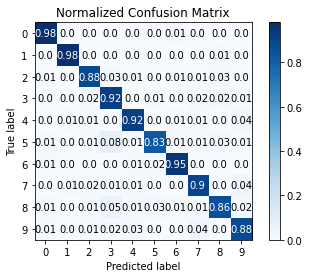

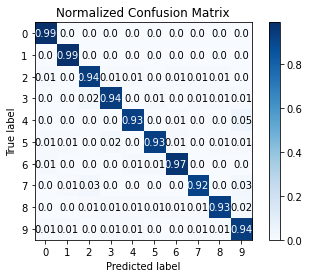

In [99]:
!pip install scikit-plot
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
print("Plot with the PCA")
skplt.metrics.plot_confusion_matrix(mnist_test_y,y_pred_pca, normalize=True)
print("Plot without the PCA")

skplt.metrics.plot_confusion_matrix(mnist_test_y,y_pred, normalize=True)

**Observations**

Accuracy for classifier for before appying PCA is greater than the accuracy after applying PCA.

Reasons#

**Time taken is high for training the model after applying PCA**

Random forest is built, is by looking at possible splits and picking the best ones according to a certain criteria.
By reducing the number of features we might have made the problem to find this splits more difficult which makes the algorithm need more iterations to find a good split.

**Accuracy after applying PCA is low**

 PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.
There is quite a possibilty that features after applying PCA might have suffered some data loss.

